In [1]:
import os
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the path to the 'data' folder located two levels outside the current directory
data_folder = os.path.join(os.pardir, os.pardir, 'data')  # Path to two levels up, '../..'
newsgroups20_data_path = os.path.join(data_folder, '20newsgroups_data')
print(f"newsgroups20")

newsgroups20


In [3]:
# Ensure the 'data' directory exists, if not, create it
if not os.path.exists(newsgroups20_data_path):
    os.makedirs(newsgroups20_data_path)

# Load the 20 Newsgroups dataset
try:
    newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, data_home=newsgroups20_data_path)
    newsgroups_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42, data_home=newsgroups20_data_path)
except FileNotFoundError:
    print("Dataset not found in the specified directory.")


### Exploring the newsgroups data

In [4]:
"""
Exploring the newsgroups data

"""
print(f"\n{newsgroups_train.keys()}")
print(f"\n20 newsgroups target name: {newsgroups_train['target_names']}")
print(f"\n20 newsgroups target key - encoded as an integer: {newsgroups_train['target']}")
print(f"\nThe range from 0 to 19, 1st, 2nd, .., and 20th newsgroup topics: {np.unique(newsgroups_train['target'])}")


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

20 newsgroups target name: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

20 newsgroups target key - encoded as an integer: [7 4 4 ... 3 1 8]

The range from 0 to 19, 1st, 2nd, .., and 20th newsgroup topics: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


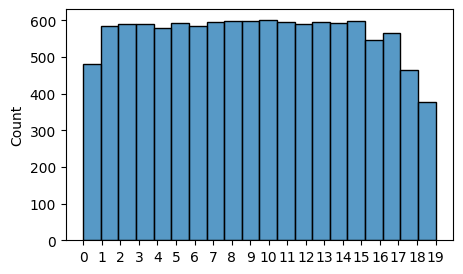

In [5]:
# Disply the distrbution of the classes
plt.figure(figsize=(5,3))
sns.histplot(newsgroups_train['target'], bins=20)
plt.xticks(range(0, 20, 1))
plt.show()

In [6]:
# let’s have a look at the first document and its topic number and name
print(f"1st Document: {newsgroups_train.data[0]}")
print(f"Topic number: {newsgroups_train['target'][0]} and Topic name: {newsgroups_train['target_names'][newsgroups_train['target'][0]]}")

1st Document: From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





Topic number: 7 and Topic name: rec.autos


**Bag of Words (BoW)**: Counting the occurence of each word token appears in a document

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# initialize the count vectorizer with the 500 top features (500 most frequent tokens):
count_vector = CountVectorizer(max_features=500)

# fit on the raw text data
data_count = count_vector.fit_transform(newsgroups_train['data'])

In [8]:
data_count

<11314x500 sparse matrix of type '<class 'numpy.int64'>'
	with 798221 stored elements in Compressed Sparse Row format>

The resulting count matrix is a sparse matrix where each row only stores non-zero elements (hence,
only 798,221 elements instead of 11314 * 500 = 5,657,000). For example, the first document is
converted into a sparse vector composed of 53 non-zero elements.

In [9]:
# print(f"{data_count}")
print(f"{data_count.shape}")
# print(f"\n{data_count[0]}")
print(f"\n{data_count[0].shape}")

(11314, 500)

(1, 500)


In [10]:
data_count.toarray()

array([[0, 0, 0, ..., 0, 2, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

So, what are those 500 top features? They can be found in the following output:


In [11]:
count_vector.get_feature_names_out()

array(['00', '000', '10', '100', '11', '12', '13', '14', '145', '15',
       '16', '17', '18', '19', '1993', '20', '21', '22', '23', '24', '25',
       '26', '27', '30', '32', '34', '40', '50', '93', 'a86', 'able',
       'about', 'above', 'ac', 'access', 'actually', 'address', 'after',
       'again', 'against', 'ago', 'all', 'already', 'also', 'always',
       'am', 'american', 'an', 'and', 'andrew', 'another', 'answer',
       'any', 'anyone', 'anything', 'apple', 'apr', 'april', 'are',
       'armenian', 'around', 'article', 'as', 'ask', 'at', 'au',
       'available', 'away', 'ax', 'b8f', 'back', 'bad', 'based', 'be',
       'because', 'been', 'before', 'being', 'believe', 'best', 'better',
       'between', 'bible', 'big', 'bill', 'bit', 'book', 'both', 'but',
       'buy', 'by', 'ca', 'call', 'called', 'came', 'can', 'canada',
       'cannot', 'car', 'card', 'case', 'cc', 'center', 'change',
       'children', 'chip', 'christian', 'clipper', 'co', 'code', 'color',
       'com', 

#### Text processing
We begin by retaining letter-only words so that numbers such as 00 and 000 and combinations of
letters and numbers such as b8f will be removed.

In [12]:
def retain_letter_only(docs):
    data_clean = []
    for doc in docs:
        doc_cleaned = ' '.join(word for word in doc.split() if word.isalpha())
        data_clean.append(doc_cleaned)
    return data_clean

data_cleaned = retain_letter_only(newsgroups_train['data'])

Putting all of these (preprocessing, dropping stop words, lemmatizing, and count vectorizing) together

In [13]:
import nltk
nltk.download()

# import the names corpus
from nltk.corpus import names
print(f"{names.words()[:10]}")
print(len(names.words()))

# import a lemmatization algorithm based on the built-in WordNet corpus
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(f"{lemmatizer.lemmatize('machines')}")

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']
7944
machine


In [14]:
all_names = set(names.words())
def get_cleaned_data(groups, lemmatizer, remove_names):
    data_cleaned = []
    for doc in groups['data']:
        doc = doc.lower()
        doc_cleaned = ' '.join(lemmatizer.lemmatize(word)
                                for word in doc.split()
                                if word.isalpha() and word not in remove_names)
        data_cleaned.append(doc_cleaned)
    return data_cleaned

data_cleaned = get_cleaned_data(newsgroups_train, lemmatizer, all_names)

# Dropping stop words
from sklearn.feature_extraction import _stop_words
count_vector_sw = CountVectorizer(stop_words="english", max_features=500)
data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)

Now the features are much more meaningful

In [15]:
# converted text from each raw newsgroup document into a sparse vector of size 500.
# print(count_vector_sw.get_feature_names_out())
# Number of word tokens i.e. 500
print(f"Number of word tokens: {len(count_vector_sw.get_feature_names_out())}")

Number of word tokens: 500


### Visualizing the newsgroups data with t-SNE
- `t-SNE` stands for t-distributed Stochastic Neighbor Embedding

In [16]:
from sklearn.manifold import TSNE

pick three distinct topics, talk.religion.misc, comp.graphics, and sci.space

In [17]:
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']
groups_3 = fetch_20newsgroups(categories=categories_3)
data_cleaned = get_cleaned_data(groups_3, lemmatizer, all_names)
data_cleaned_count_3 = count_vector_sw.fit_transform(data_cleaned)

we apply t-SNE to reduce the 500-dimensional matrix to a two-dimensional matrix:

In [19]:
# tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)
# data_tsne = tsne_model.fit_transform(data_cleaned_count_3.toarray())

- n_components: The output dimension
- perplexity: The number of nearest data points considered neighbors in the algorithm with
a typical value of between 5 and 50
- random_state: The random seed for program reproducibility
- learning_rate: The factor affecting the process of finding the optimal mapping space with a
typical value of between 10 and 1,000

Note that the TSNE object only takes in a dense matrix, hence we convert the sparse matrix, data_
cleaned_count_3, into a dense one using toarray().

### Word Embedding
Word count representation results in a high-dimensional, sparse vector where each element represents
the frequency of a specific word. Recall that we only looked at the 500 most frequent words previously
to avoid this issue. Otherwise, we would have to represent each document with a vector of more than
1 million dimensions (depending on the size of the vocabulary). Also, word count representation lacks
the ability to capture the semantics or context of words. It only considers the frequency of words in
a document or corpus. On the contrary, word embedding represents words in a dense (continuous)
vector space.